# Herpeton Project - Combined Notebook

This is an attempt to bring `notebook.ipynb` and `preprocess_bug_fix.ipynb` into a unified state for simpler working.



# Step 1: Environment Setup and Compatibility Checks

Initial runs of the notebook generated PyArrow issues so we added this to resolve if needed. It may simply run and complete sucessfully.

In [1]:
import subprocess
import sys
import importlib

def check_and_fix_pyarrow():
    """Check PyArrow version and fix compatibility issues"""
    print("Checking PyArrow compatibility")

    try:
        import pyarrow as pa
        print(f"PyArrow version: {pa.__version__}")

        # Test for the extension type attribute
        if hasattr(pa.lib, 'PyExtensionType'):
            print("PyExtensionType is available")
            return True
        else:
            print("PyExtensionType not found - version issue detected")
            return False

    except ImportError:
        print("PyArrow not installed")
        return False

def fix_pyarrow_compatibility():
    """Fix PyArrow version compatibility and numpy/pandas binary issues"""
    print("\nFixing PyArrow/Pandas/Numpy compatibility")

    try:
        # Aggressively uninstall potentially conflicting packages
        print("Uninstalling existing PyArrow, Pandas, and Numpy...")
        subprocess.check_call([sys.executable, "-m", "pip", "uninstall", "-y", "pyarrow", "pandas", "numpy"])

        # Install specific compatible versions with force-reinstall
        print("Installing compatible Numpy version (1.23.5) with force-reinstall")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "--force-reinstall", "numpy==1.23.5"])

        print("Installing compatible Pandas version (2.0.3) with force-reinstall")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "--force-reinstall", "pandas==2.0.3"])

        print("Installing compatible PyArrow version (14.0.2) with force-reinstall")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "--force-reinstall", "pyarrow==14.0.2"])

        print("Compatibility fix complete.")
        return True

    except subprocess.CalledProcessError as e:
        print(f"Failed to fix compatibility: {e}")
        return False

def install_package(package_name, import_name=None):
    """Install a package and verify it can be imported"""
    if import_name is None:
        import_name = package_name

    try:
        # Try to import the package
        importlib.import_module(import_name)
        print(f"{package_name} is already installed")
        return True
    except ImportError:
        print(f"Installing {package_name}")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
            print(f"{package_name} installed successfully")
            return True
        except subprocess.CalledProcessError as e:
            print(f"Failed to install {package_name}: {e}")
            return False

print("Setting up BioTrove Reptilia processing environment")
print("=" * 60)

should_fix_compatibility = False
try:
    import pyarrow as pa
    import pandas as pd
    import numpy as np
    print(f"Current PyArrow version: {pa.__version__}")
    print(f"Current Pandas version: {pd.__version__}")
    print(f"Current Numpy version: {np.__version__}")

    # Check if current versions are within the desired range.
    # The fix targets pyarrow==14.0.2 and pandas==2.0.3, numpy==1.23.5.
    # So, if they are not these exact versions, trigger the fix.
    if pa.__version__ != "14.0.2" or pd.__version__ != "2.0.3" or np.__version__ != "1.23.5":
        print("Detected incompatible versions for PyArrow, Pandas, or Numpy. Triggering fix.")
        should_fix_compatibility = True
    else:
        print("PyArrow, Pandas, and Numpy versions are compatible.")
except Exception as e: # Catch a broader exception here to include ValueError
    print(f"An error occurred during initial PyArrow, Pandas, or Numpy import/check: {e}")
    print("Triggering compatibility fix.")
    should_fix_compatibility = True

if should_fix_compatibility:
    print("\nAttempting to fix compatibility")
    if fix_pyarrow_compatibility():
        # Re-check after fix
        try:
            import pyarrow as pa_fixed
            import pandas as pd_fixed
            import numpy as np_fixed
            if pa_fixed.__version__ == "14.0.2" and pd_fixed.__version__ == "2.0.3" and np_fixed.__version__ == "1.23.5":
                print("PyArrow, Pandas, and Numpy issues resolved.")
            else:
                print("WARNING: PyArrow, Pandas, or Numpy issue persists after fix.")
                print(f"  PyArrow: {pa_fixed.__version__} (Expected 14.0.2)")
                print(f"  Pandas: {pd_fixed.__version__} (Expected 2.0.3)")
                print(f"  Numpy: {np_fixed.__version__} (Expected 1.23.5)")
        except ImportError:
            print("ERROR: PyArrow, Pandas, or Numpy still not importable after fix.")
    else:
        print("ERROR: Could not automatically fix compatibility for PyArrow, Pandas, Numpy. You may need to restart the runtime and try again.")

print("\n" + "=" * 60)

# List of required packages (with specific versions to avoid conflicts)
required_packages = [
    ("arbor-process", "arbor_process"),
    ("nest_asyncio", "nest_asyncio"),
    ("datasets>=2.14.0", "datasets"),
    ("matplotlib", "matplotlib"),
    ("seaborn", "seaborn"),
    ("pillow", "PIL"),
    ("requests", "requests"),
    ("tqdm", "tqdm"),
    ("python-dotenv", "dotenv"),
    ("huggingface_hub", "huggingface_hub"),
    ("webdataset", "webdataset")
]

# Install packages
all_installed = True
for package_name, import_name in required_packages:
    if not install_package(package_name, import_name):
        all_installed = False

if all_installed:
    print("\nAll packages installed successfully")
    print("Ready to process BioTrove Reptilia dataset")
else:
    print("\nWARNING: Some packages failed to install")
    print("You may need to install them manually")

print("\nNOTE: If PyArrow errors persist, try:")
print("   pip install --force-reinstall pyarrow==14.0.2")
print("   pip install --force-reinstall pandas==2.0.3")
print("   pip install --force-reinstall numpy==1.23.5")
print("   If problems persist, try restarting your Colab runtime (Runtime > Restart runtime) and re-running the cells.")

print("\n" + "=" * 60)

Setting up BioTrove Reptilia processing environment
Current PyArrow version: 16.1.0
Current Pandas version: 2.2.2
Current Numpy version: 1.26.4
Detected incompatible versions for PyArrow, Pandas, or Numpy. Triggering fix.

Attempting to fix compatibility

Fixing PyArrow/Pandas/Numpy compatibility
Uninstalling existing PyArrow, Pandas, and Numpy...
Installing compatible Numpy version (1.23.5) with force-reinstall
Failed to fix compatibility: Command '['/usr/bin/python3', '-m', 'pip', 'install', '--force-reinstall', 'numpy==1.23.5']' returned non-zero exit status 1.
ERROR: Could not automatically fix compatibility for PyArrow, Pandas, Numpy. You may need to restart the runtime and try again.

arbor-process is already installed
nest_asyncio is already installed
Installing datasets>=2.14.0
datasets>=2.14.0 installed successfully
matplotlib is already installed
seaborn is already installed
pillow is already installed
requests is already installed
tqdm is already installed
python-dotenv is a

# Step 2: Import Required Libraries

Import all necessary libraries for the BioTrove processing pipeline.

In [2]:
# Core imports
import os
import random
import shutil
import time
import json
import pandas as pd
import numpy as np
import webdataset as wds
import math
from pathlib import Path
from dotenv import load_dotenv
from tqdm import tqdm

# HuggingFace and BioTrove tools
from huggingface_hub import snapshot_download
from arbor_process import MetadataProcessor, GenShuffledChunks, GetImages, GenImgTxtPair

# For async operations
import nest_asyncio
nest_asyncio.apply()

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

print("All libraries imported successfully.")

All libraries imported successfully.


# Step 3: Environment Configuration

Load environment variables and configure HuggingFace authentication.

In [3]:
# Fetch HF token from .env
load_dotenv()

hf_token = os.getenv("HF_TOKEN") # This expects an .env file with HF_TOKEN variable and the .env file is identitifed in the .gitignore file.

# Check if HF token is available
if hf_token is None:
    print("WARNING: HF_TOKEN not found in environment variables.")

else:
    print("HuggingFace token loaded successfully")

# Step 4: Configure Directory Structure

Set up the directory structure for data processing.

In [ ]:
# Configure all data paths
DATA_ROOT = Path("data/biotrove_train")
META_DIR = DATA_ROOT / "raw_metadata"
PARAQUETS_PATH = META_DIR / "BioTrove-train"
OUT_DIR = DATA_ROOT / "processed_metadata"
FILTERED_OUT = DATA_ROOT / "filtered_reptilia"
INPUT_PARQUETS = FILTERED_OUT / "merged_cases"
IMG_DIR = DATA_ROOT / "images_reptilia"
SPLITS_CSV = DATA_ROOT / "reptilia_tar_splits.csv"
COUNTS = DATA_ROOT / "processed_metadata" / "combined_sample_counts_per_species.csv"

# Create directories
META_DIR.mkdir(parents=True, exist_ok=True)
OUT_DIR.mkdir(parents=True, exist_ok=True)
INPUT_PARQUETS.mkdir(parents=True, exist_ok=True)
IMG_DIR.mkdir(parents=True, exist_ok=True)

print("Directory structure created:")
print(f"  Data root: {DATA_ROOT}")
print(f"  Metadata: {META_DIR}")
print(f"  Processed: {OUT_DIR}")
print(f"  Images: {IMG_DIR}")

Directory structure created:
  Data root: data/biotrove_train
  Metadata: data/biotrove_train/raw_metadata
  Processed: data/biotrove_train/processed_metadata
  Images: data/biotrove_train/images_reptilia


# Step 5: Download BioTrove Metadata

Download metadata from HuggingFace (parquet files only).

In [ ]:
# Download the biotrove-train metadata from huggingface
print("Downloading BioTrove metadata from HuggingFace")
print("=" * 60)

snapshot_download(
    repo_id="BGLab/BioTrove-Train",
    repo_type="dataset",
    local_dir=str(META_DIR),
    # Only download parquet files
    allow_patterns=["BioTrove-Train/*.parquet"],
)

print("\nMetadata download complete")

# Check downloaded files
parquet_files = list(PARAQUETS_PATH.glob("*.parquet"))
print(f"Downloaded {len(parquet_files)} parquet files")

Fetching 2692 files:   0%|          | 0/2692 [00:00<?, ?it/s]


Metadata download complete
Downloaded 2692 parquet files


# Step 6: Process Metadata with MetadataProcessor

Use the official BioTrove MetadataProcessor to extract Reptilia samples.

Processing parquet files with MetadataProcessor
Processed file: data/biotrove_train/raw_metadata/BioTrove-train/chunk_77.parquet
Processed file: data/biotrove_train/raw_metadata/BioTrove-train/chunk_2037.parquetProcessed file: data/biotrove_train/raw_metadata/BioTrove-train/chunk_67.parquet

Processed file: data/biotrove_train/raw_metadata/BioTrove-train/chunk_2027.parquet
Processed file: data/biotrove_train/raw_metadata/BioTrove-train/chunk_1470.parquet
Processed file: data/biotrove_train/raw_metadata/BioTrove-train/chunk_1706.parquet
Processed file: data/biotrove_train/raw_metadata/BioTrove-train/chunk_2514.parquet
Processed file: data/biotrove_train/raw_metadata/BioTrove-train/chunk_1460.parquet
Processed file: data/biotrove_train/raw_metadata/BioTrove-train/chunk_692.parquet
Processed file: data/biotrove_train/raw_metadata/BioTrove-train/chunk_1508.parquet
Processed file: data/biotrove_train/raw_metadata/BioTrove-train/chunk_2037.parquetProcessed file: data/biotrove_train/raw_metad

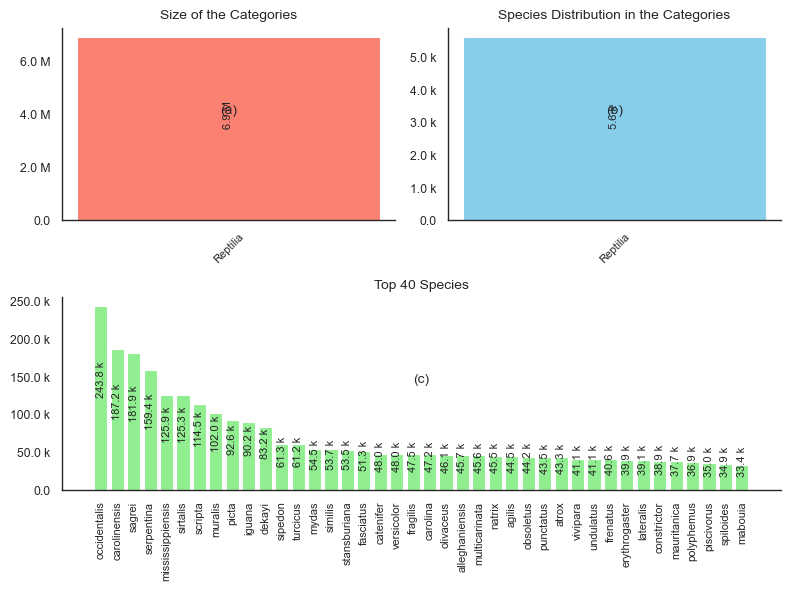

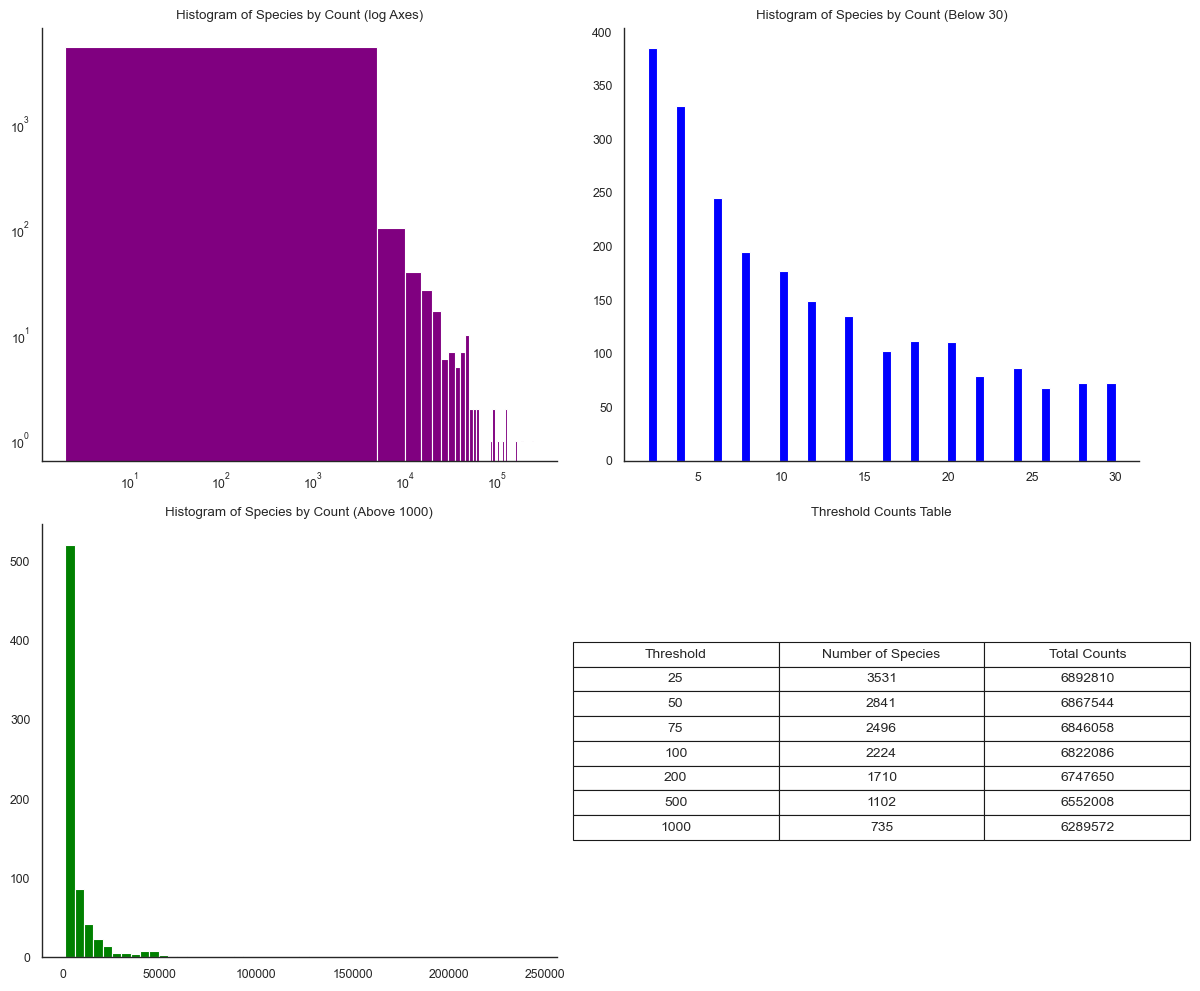

In [ ]:
# Process the parquet files into csvs
print("Processing parquet files with MetadataProcessor")
print("=" * 60)

mp = MetadataProcessor(
    source_folder=str(PARAQUETS_PATH),
    destination_folder=str(OUT_DIR),
    categories=["Reptilia"],
)
mp.process_all_files()

print("\nMetadata processing complete")

# Step 7: GenShuffledChunks Override

In [ ]:
# Generate shuffled chunks with filtering
# This filters the parquet read method to remove any non-reptilia data for efficient processing for our usage.

class GenShuffledChunksReptilia(GenShuffledChunks):
    def process_files(self):
        """
        Process files based on configuration parameters. Filters rare cases,
        caps frequent cases, and shuffles the data into specified parts.
        """
        start_time = time.time()

        final_counts = pd.read_csv(self.species_count_data)
        rare_case = set(final_counts[final_counts['count'] < self.rare_threshold]['species'])
        frequent_case = set(final_counts[final_counts['count'] > self.cap_threshold]['species'])

        for dir_path in [self.rare_dir, self.cap_filtered_dir_train, self.capped_dir, self.merged_dir]:
            if os.path.exists(dir_path):
                shutil.rmtree(dir_path)
            os.makedirs(dir_path, exist_ok=True)

        frequent_counts = {}
        capped_cases = []
        files = [f for f in os.listdir(self.directory) if f.endswith(".parquet")]

        for filename in tqdm(files, desc="Processing files"):
            filepath = os.path.join(self.directory, filename)
            # KEY FIX: Add filter to only read Reptilia class
            df = pd.read_parquet(filepath, filters=[("class", "==", "Reptilia")]).dropna()

            rare_df = df[df['species'].isin(rare_case)]
            capped_filtered_df = df[~df['species'].isin(rare_case)]

            rare_df.to_parquet(os.path.join(self.rare_dir, filename), index=False)

            frequent_df = capped_filtered_df[capped_filtered_df['species'].isin(frequent_case)]
            frequent_case_counts = frequent_df['species'].value_counts().to_dict()

            for case, count in frequent_case_counts.items():
                frequent_counts[case] = frequent_counts.get(case, 0) + count
                if frequent_counts[case] > self.cap_threshold and case not in capped_cases:
                    capped_cases.append(case)
                    cap_case_df = frequent_df[frequent_df['species'] == case]
                    cap_case_df.to_parquet(os.path.join(self.capped_dir, f'capped_{case}.parquet'), index=False)

            capped_df = capped_filtered_df[~capped_filtered_df['species'].isin(capped_cases)]
            df_shuffled = capped_df.sample(frac=1, random_state=self.random_seed).reset_index(drop=True)
            num_parts = max(1, round(len(df_shuffled) / self.part_size))
            rows_per_part = len(df_shuffled) // num_parts

            df_parts = [df_shuffled.iloc[i * rows_per_part: (i + 1) * rows_per_part] for i in range(num_parts)]

            if len(df_shuffled) % num_parts != 0:
                df_parts[-1] = pd.concat([df_parts[-1], df_shuffled.iloc[num_parts * rows_per_part:]], ignore_index=True)

            base_filename, _ = os.path.splitext(filename)
            for i, part in enumerate(df_parts):
                cap_filtered_filepath = os.path.join(self.cap_filtered_dir_train, f'{base_filename}_part{i+1}.parquet')
                part.to_parquet(cap_filtered_filepath, index=False)

        self.merge_shuffled_files()
        elapsed_time = time.time() - start_time
        print(f"Processing completed in {elapsed_time:.2f} seconds.")

print("GenShuffledChunksReptilia class defined")

GenShuffledChunksReptilia class defined


# Step 8: Generate Shuffled and Balanced Chunks

Process the data with filtering and balancing:
- Drop species with < 1000 samples (rare threshold)
- Cap species at 50 samples max (cap threshold)
- Shuffle and organize into chunks

In [ ]:
# Generate shuffled chunks with filtering
print("Generating shuffled and balanced chunks")
print("=" * 60)
print("Configuration:")
print("  - Rare threshold: 1000 (drop species with <1000 samples)")
print("  - Cap threshold: 50 (cap species above this count)")
print("  - Part size: 500 rows per shuffled part")
print()

gen = GenShuffledChunksReptilia(
    species_count_data=COUNTS,
    directory=PARAQUETS_PATH,
    rare_threshold=1000,          # drop species with <1000 samples
    cap_threshold=50,             # cap species above this count
    part_size=500,                # rows per shuffled part
    rare_dir=str(FILTERED_OUT / "rare_cases"),
    cap_filtered_dir_train=str(FILTERED_OUT / "cap_filtered_train"),
    capped_dir=str(FILTERED_OUT / "capped_cases"),
    merged_dir=str(FILTERED_OUT / "merged_cases"),
    files_per_chunk=80,
    random_seed=521,
)
gen.process_files()

print("\nChunk generation complete.")

Generating shuffled and balanced chunks
Configuration:
  - Rare threshold: 1000 (drop species with <1000 samples)
  - Cap threshold: 50 (cap species above this count)
  - Part size: 500 rows per shuffled part



Merging files:   6%|▌         | 2/35 [00:00<00:02, 11.97it/s]

Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0001.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0002.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0003.parquet


Merging files:  17%|█▋        | 6/35 [00:00<00:02, 12.14it/s]

Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0004.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0005.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0006.parquet


Merging files:  23%|██▎       | 8/35 [00:00<00:02, 12.24it/s]

Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0007.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0008.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0009.parquet


Merging files:  34%|███▍      | 12/35 [00:00<00:01, 11.92it/s]

Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0010.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0011.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0012.parquet


Merging files:  40%|████      | 14/35 [00:01<00:01, 11.96it/s]

Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0013.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0014.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0015.parquet


Merging files:  51%|█████▏    | 18/35 [00:01<00:01, 12.05it/s]

Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0016.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0017.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0018.parquet


Merging files:  57%|█████▋    | 20/35 [00:01<00:01, 12.20it/s]

Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0019.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0020.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0021.parquet


Merging files:  69%|██████▊   | 24/35 [00:01<00:00, 12.31it/s]

Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0022.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0023.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0024.parquet


Merging files:  74%|███████▍  | 26/35 [00:02<00:00, 12.33it/s]

Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0025.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0026.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0027.parquet


Merging files:  86%|████████▌ | 30/35 [00:02<00:00, 12.33it/s]

Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0028.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0029.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0030.parquet


Merging files:  91%|█████████▏| 32/35 [00:02<00:00, 12.38it/s]

Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0031.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0032.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0033.parquet


Merging files: 100%|██████████| 35/35 [00:02<00:00, 12.53it/s]

Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0034.parquet
Saved merged chunk: data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0035.parquet
Merging completed in 2.80 seconds.
Processing completed in 21.59 seconds.

Chunk generation complete.


# Step 9: Verify Filtered Dataset

In [ ]:
# Verify the filtered parquet files
import pyarrow.parquet as pq

print("VERIFICATION: Filtered Dataset")
print("=" * 60)

parquet_dir = INPUT_PARQUETS
total_rows = 0
files = sorted(Path(parquet_dir).glob("*.parquet"))

for f in files:
    total_rows += pq.ParquetFile(f).metadata.num_rows

print(f"Parquet files: {len(files)}")
print(f"Total rows: {total_rows:,}")
print()

# Load a sample to check structure
if files:
    sample_df = pd.read_parquet(files[0])
    print(f"Columns: {list(sample_df.columns)}")
    print(f"\nFirst few rows:")
    print(sample_df.head(3))

print("\n" + "=" * 60)

VERIFICATION: Filtered Dataset
Parquet files: 35
Total rows: 20,882

Columns: ['photo_id', 'scientificName', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species', 'common_name', 'taxonRank', 'photo_url']

First few rows:
    photo_id           scientificName   kingdom    phylum     class     order  \
0  220359309  Pseudechis porphyriacus  Animalia  Chordata  Reptilia  Squamata   
1  219611804     Gowidon longirostris  Animalia  Chordata  Reptilia  Squamata   
2  220136241     Plestiodon finitimus  Animalia  Chordata  Reptilia  Squamata   

      family       genus       species                common_name taxonRank  \
0   Elapidae  Pseudechis  porphyriacus    Red-bellied Black Snake   species   
1   Agamidae     Gowidon  longirostris    Long-nosed Water Dragon   species   
2  Scincidae  Plestiodon     finitimus  Japanese five-lined skink   species   

                                           photo_url  
0  http://inaturalist-open-data.s3.amazonaws.com/...  
1  http://in

# Step 10: Download Images

In [ ]:
# Download images with high concurrency using the GetImages class.
print("Downloading images")
print("=" * 60)
print(f"Output directory: {IMG_DIR}")
print(f"Concurrent downloads: 1000")
print()

gi = GetImages(
    INPUT_PARQUETS,
    output_folder=str(IMG_DIR),
    concurrent_downloads=1000,
)
await gi.download_images()

print("\nImage download complete.")

# Count downloaded images
image_files = list(IMG_DIR.rglob("*.jpg"))
print(f"Downloaded images: {len(image_files)}")

Output directory: data/biotrove_train/images_reptilia
Concurrent downloads: 1000



  0%|          | 1/507 [00:00<03:37,  2.33it/s]

Error downloading image None: HTTP error: 404


 24%|██▎       | 120/507 [00:01<00:01, 200.47it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 39%|███▉      | 197/507 [00:01<00:01, 277.86it/s]

Error downloading image None: HTTP error: 404


 63%|██████▎   | 319/507 [00:01<00:00, 357.25it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 87%|████████▋ | 442/507 [00:01<00:00, 392.23it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


100%|██████████| 507/507 [00:02<00:00, 222.88it/s]


Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0030.parquet with 9 errors.


0it [00:00, ?it/s]
0it [00:00, ?it/s]


Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0020.parquet with 0 errors.


0it [00:00, ?it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0016.parquet with 0 errors.


  2%|▏         | 11/558 [00:00<00:05, 107.71it/s]

Error downloading image None: HTTP error: 404


 21%|██▏       | 119/558 [00:00<00:01, 347.27it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 66%|██████▌   | 366/558 [00:01<00:00, 395.22it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 90%|████████▉ | 501/558 [00:01<00:00, 411.98it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


100%|██████████| 558/558 [00:01<00:00, 350.61it/s]


Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0006.parquet with 9 errors.


100%|██████████| 5/5 [00:00<00:00, 22.05it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0029.parquet with 0 errors.


 37%|███▋      | 185/500 [00:00<00:00, 388.11it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 55%|█████▌    | 276/500 [00:00<00:00, 411.17it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 73%|███████▎  | 364/500 [00:00<00:00, 404.04it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


100%|██████████| 500/500 [00:01<00:00, 350.60it/s]


Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0007.parquet with 7 errors.


0it [00:00, ?it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0017.parquet with 0 errors.


  0%|          | 0/1491 [00:00<?, ?it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


  6%|▌         | 88/1491 [00:00<00:07, 194.25it/s]

Error downloading image None: HTTP error: 404


 17%|█▋        | 247/1491 [00:00<00:03, 337.38it/s]

Error downloading image None: HTTP error: 404


 31%|███       | 461/1491 [00:01<00:02, 418.65it/s]

Error downloading image None: HTTP error: 404


 44%|████▎     | 649/1491 [00:01<00:01, 466.84it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 54%|█████▎    | 800/1491 [00:02<00:01, 460.94it/s]

Error downloading image None: HTTP error: 404


 60%|██████    | 898/1491 [00:02<00:01, 445.53it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 80%|███████▉  | 1190/1491 [00:03<00:00, 451.21it/s]

Error downloading image None: HTTP error: 404


 88%|████████▊ | 1316/1491 [00:03<00:00, 344.17it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


100%|██████████| 1491/1491 [00:04<00:00, 372.51it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0028.parquet with 18 errors.


 36%|███▌      | 193/542 [00:00<00:00, 371.47it/s]

Error downloading image None: HTTP error: 404


 62%|██████▏   | 334/542 [00:00<00:00, 433.24it/s]

Error downloading image None: HTTP error: 404


100%|██████████| 542/542 [00:01<00:00, 367.26it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0021.parquet with 2 errors.


  5%|▍         | 25/507 [00:00<00:01, 248.61it/s]

Error downloading image None: HTTP error: 404


 67%|██████▋   | 338/507 [00:00<00:00, 361.19it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


100%|██████████| 507/507 [00:01<00:00, 364.07it/s]

Error downloading image None: HTTP error: 404
Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0031.parquet with 4 errors.



  3%|▎         | 47/1528 [00:00<00:05, 258.99it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 25%|██▍       | 381/1528 [00:01<00:03, 320.26it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 32%|███▏      | 491/1528 [00:01<00:03, 336.02it/s]

Error downloading image None: HTTP error: 404


 44%|████▍     | 676/1528 [00:02<00:01, 429.80it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 50%|████▉     | 761/1528 [00:02<00:01, 402.69it/s]

Error downloading image None: HTTP error: 404


 70%|███████   | 1072/1528 [00:03<00:01, 394.94it/s]

Error downloading image None: HTTP error: 404


 78%|███████▊  | 1196/1528 [00:03<00:00, 394.65it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 81%|████████▏ | 1243/1528 [00:03<00:00, 412.34it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


100%|█████████▉| 1524/1528 [00:04<00:00, 455.05it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


100%|██████████| 1528/1528 [00:04<00:00, 356.69it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0015.parquet with 23 errors.


  2%|▏         | 21/1014 [00:00<00:05, 197.91it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 42%|████▏     | 421/1014 [00:01<00:01, 365.46it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 53%|█████▎    | 539/1014 [00:01<00:01, 382.14it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 63%|██████▎   | 637/1014 [00:01<00:00, 437.36it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 76%|███████▋  | 774/1014 [00:02<00:00, 409.38it/s]

Error downloading image None: HTTP error: 404


 95%|█████████▍| 962/1014 [00:02<00:00, 437.00it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


100%|██████████| 1014/1014 [00:02<00:00, 343.67it/s]


Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0005.parquet with 14 errors.


100%|██████████| 4/4 [00:00<00:00, 23.24it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0033.parquet with 0 errors.


  4%|▍         | 20/507 [00:00<00:02, 198.13it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 42%|████▏     | 215/507 [00:00<00:00, 419.49it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 61%|██████    | 309/507 [00:00<00:00, 438.53it/s]

Error downloading image None: HTTP error: 404


 88%|████████▊ | 445/507 [00:01<00:00, 410.06it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


100%|██████████| 507/507 [00:01<00:00, 360.28it/s]


Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0023.parquet with 7 errors.


0it [00:00, ?it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0022.parquet with 0 errors.


  2%|▏         | 19/1009 [00:00<00:05, 181.89it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 23%|██▎       | 237/1009 [00:00<00:02, 372.27it/s]

Error downloading image None: HTTP error: 404


 32%|███▏      | 322/1009 [00:00<00:01, 399.63it/s]

Error downloading image None: HTTP error: 404


 42%|████▏     | 419/1009 [00:01<00:01, 442.45it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 84%|████████▍ | 847/1009 [00:01<00:00, 471.31it/s]

Error downloading image None: HTTP error: 404


 94%|█████████▍| 952/1009 [00:02<00:00, 493.32it/s]

Error downloading image None: HTTP error: 404


100%|██████████| 1009/1009 [00:02<00:00, 418.15it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0032.parquet with 8 errors.


 10%|█         | 153/1491 [00:00<00:03, 347.83it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 19%|█▊        | 278/1491 [00:00<00:03, 392.80it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 29%|██▉       | 430/1491 [00:01<00:02, 445.57it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 38%|███▊      | 565/1491 [00:01<00:02, 395.92it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 58%|█████▊    | 862/1491 [00:02<00:01, 357.15it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 73%|███████▎  | 1089/1491 [00:02<00:00, 417.67it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 82%|████████▏ | 1227/1491 [00:03<00:00, 431.70it/s]

Error downloading image None: HTTP error: 404


100%|██████████| 1491/1491 [00:03<00:00, 383.54it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0004.parquet with 15 errors.


100%|██████████| 502/502 [00:01<00:00, 421.29it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0014.parquet with 0 errors.


  2%|▏         | 20/1007 [00:00<00:04, 197.40it/s]

Error downloading image None: HTTP error: 404


 20%|█▉        | 200/1007 [00:00<00:02, 378.27it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 37%|███▋      | 370/1007 [00:01<00:01, 414.41it/s]

Error downloading image None: HTTP error: 404


 51%|█████     | 510/1007 [00:01<00:01, 445.56it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 60%|█████▉    | 600/1007 [00:01<00:00, 434.31it/s]

Error downloading image None: HTTP error: 404


 73%|███████▎  | 739/1007 [00:01<00:00, 445.29it/s]

Error downloading image None: HTTP error: 404


 84%|████████▍ | 847/1007 [00:02<00:00, 495.04it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 98%|█████████▊| 989/1007 [00:02<00:00, 414.98it/s]

Error downloading image None: HTTP error: 404


100%|██████████| 1007/1007 [00:02<00:00, 387.65it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0011.parquet with 12 errors.


  0%|          | 0/1469 [00:00<?, ?it/s]

Error downloading image None: HTTP error: 404


 14%|█▍        | 206/1469 [00:00<00:03, 337.27it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 26%|██▌       | 381/1469 [00:01<00:02, 371.77it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 35%|███▍      | 513/1469 [00:01<00:02, 387.27it/s]

Error downloading image None: HTTP error: 404


 44%|████▍     | 649/1469 [00:01<00:02, 397.91it/s]

Error downloading image None: HTTP error: 404


 50%|████▉     | 729/1469 [00:02<00:02, 360.15it/s]

Error downloading image None: HTTP error: 404


 57%|█████▋    | 840/1469 [00:02<00:02, 313.01it/s]

Error downloading image None: HTTP error: 404


 68%|██████▊   | 998/1469 [00:02<00:01, 350.34it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 78%|███████▊  | 1145/1469 [00:03<00:00, 403.98it/s]

Error downloading image None: HTTP error: 404


 84%|████████▍ | 1231/1469 [00:03<00:00, 405.17it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 96%|█████████▌| 1408/1469 [00:03<00:00, 422.98it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


100%|██████████| 1469/1469 [00:04<00:00, 360.92it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0001.parquet with 19 errors.


  0%|          | 1/1000 [00:00<01:41,  9.88it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 16%|█▌        | 162/1000 [00:00<00:02, 365.51it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 28%|██▊       | 284/1000 [00:00<00:01, 393.14it/s]

Error downloading image None: HTTP error: 404


 37%|███▋      | 369/1000 [00:01<00:01, 405.82it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 67%|██████▋   | 670/1000 [00:01<00:00, 465.06it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 85%|████████▍ | 847/1000 [00:02<00:00, 355.28it/s]

Error downloading image None: HTTP error: 404


 98%|█████████▊| 980/1000 [00:02<00:00, 405.10it/s]

Error downloading image None: HTTP error: 404


100%|██████████| 1000/1000 [00:03<00:00, 299.90it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0027.parquet with 13 errors.


  3%|▎         | 14/484 [00:00<00:03, 137.91it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 58%|█████▊    | 279/484 [00:00<00:00, 355.94it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


100%|██████████| 484/484 [00:01<00:00, 309.69it/s]


Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0008.parquet with 4 errors.


100%|██████████| 3/3 [00:00<00:00, 18.08it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0018.parquet with 0 errors.


  5%|▍         | 23/500 [00:00<00:02, 223.40it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 35%|███▍      | 174/500 [00:00<00:00, 384.70it/s]

Error downloading image None: HTTP error: 404


 92%|█████████▏| 458/500 [00:01<00:00, 443.84it/s]

Error downloading image None: HTTP error: 404


100%|██████████| 500/500 [00:01<00:00, 268.55it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0026.parquet with 5 errors.


 67%|██████▋   | 671/1003 [00:01<00:00, 464.32it/s]

Error downloading image None: HTTP error: 404


 76%|███████▌  | 763/1003 [00:01<00:00, 383.84it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


100%|██████████| 1003/1003 [00:02<00:00, 344.69it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0019.parquet with 3 errors.


 61%|██████    | 305/502 [00:00<00:00, 431.91it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


100%|██████████| 502/502 [00:01<00:00, 371.46it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0009.parquet with 2 errors.


100%|██████████| 38/38 [00:00<00:00, 157.62it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0010.parquet with 0 errors.


 51%|█████▏    | 250/486 [00:00<00:00, 408.43it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 88%|████████▊ | 428/486 [00:01<00:00, 417.24it/s]

Error downloading image None: HTTP error: 404


100%|██████████| 486/486 [00:01<00:00, 360.11it/s]


Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0034.parquet with 3 errors.


  3%|▎         | 14/514 [00:00<00:03, 130.53it/s]

Error downloading image None: HTTP error: 404


 75%|███████▌  | 388/514 [00:01<00:00, 421.97it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


100%|██████████| 514/514 [00:01<00:00, 356.52it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0024.parquet with 5 errors.


  7%|▋         | 149/2003 [00:00<00:05, 331.09it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 22%|██▏       | 438/2003 [00:01<00:03, 414.91it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 28%|██▊       | 565/2003 [00:01<00:03, 411.06it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 38%|███▊      | 753/2003 [00:01<00:02, 451.30it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 42%|████▏     | 848/2003 [00:02<00:02, 450.48it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 47%|████▋     | 948/2003 [00:02<00:02, 451.43it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 61%|██████    | 1225/2003 [00:03<00:01, 438.72it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 66%|██████▌   | 1313/2003 [00:03<00:01, 402.33it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 72%|███████▏  | 1449/2003 [00:03<00:01, 426.48it/s]

Error downloading image None: HTTP error: 404


 83%|████████▎ | 1669/2003 [00:04<00:00, 384.10it/s]

Error downloading image None: HTTP error: 404


 92%|█████████▏| 1839/2003 [00:04<00:00, 392.67it/s]

Error downloading image None: HTTP error: 404


 96%|█████████▌| 1918/2003 [00:04<00:00, 362.16it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


100%|█████████▉| 1994/2003 [00:05<00:00, 342.54it/s]

Error downloading image None: HTTP error: 404


100%|██████████| 2003/2003 [00:05<00:00, 379.79it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0012.parquet with 25 errors.


0it [00:00, ?it/s]
0it [00:00, ?it/s]


Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0002.parquet with 0 errors.


100%|██████████| 660/660 [00:01<00:00, 371.12it/s]


Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0003.parquet with 0 errors.


0it [00:00, ?it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0013.parquet with 0 errors.


 40%|███▉      | 416/1048 [00:01<00:01, 371.55it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 55%|█████▌    | 578/1048 [00:01<00:01, 375.57it/s]

Error downloading image None: HTTP error: 404


 71%|███████▏  | 749/1048 [00:02<00:00, 396.95it/s]

Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404
Error downloading image None: HTTP error: 404


 98%|█████████▊| 1030/1048 [00:02<00:00, 422.99it/s]

Error downloading image None: HTTP error: 404


100%|██████████| 1048/1048 [00:02<00:00, 355.58it/s]



Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0025.parquet with 7 errors.


0it [00:00, ?it/s]
0it [00:00, ?it/s]


Completed data/biotrove_train/filtered_reptilia/merged_cases/processed_chunks_0035.parquet with 0 errors.

Image download complete.
Downloaded images: 30267
Downloaded images: 30267


# Step 11: Generate Image-Text Pairs

In [ ]:
# Generate image-text pairs for ML training
print("Generating image-text pairs")
print("=" * 60)

textgen = GenImgTxtPair(
    INPUT_PARQUETS,
    img_folder=IMG_DIR,
    generate_tar=True,
)

textgen.create_image_text_pairs()

print("\nImage-text pairs generated.")

Generating image-text pairs
Text files for processed_chunks_0021 created in 0.34 seconds.
Text files for processed_chunks_0021 created in 0.34 seconds.
Tar file for processed_chunks_0021 created: data/biotrove_train/images_reptilia_tar/processed_chunks_0021.tar in 2.25 seconds.
Tar file for processed_chunks_0021 created: data/biotrove_train/images_reptilia_tar/processed_chunks_0021.tar in 2.25 seconds.
Text files for processed_chunks_0026 created in 0.31 seconds.
Text files for processed_chunks_0026 created in 0.31 seconds.
Tar file for processed_chunks_0026 created: data/biotrove_train/images_reptilia_tar/processed_chunks_0026.tar in 2.27 seconds.
Tar file for processed_chunks_0026 created: data/biotrove_train/images_reptilia_tar/processed_chunks_0026.tar in 2.27 seconds.
Text files for processed_chunks_0019 created in 0.70 seconds.
Text files for processed_chunks_0019 created in 0.70 seconds.
Tar file for processed_chunks_0019 created: data/biotrove_train/images_reptilia_tar/processe

# Step 12: Create Train/Val/Test Splits

In [ ]:
# Create balanced train/val/test splits of 80/10/10 with a minimum image count per class of 20.
print("Creating dataset splits")
print("=" * 60)

min_images_per_class = 20
split_ratios = {"train": 0.8, "val": 0.1, "test": 0.1}

print(f"Configuration:")
print(f"  - Minimum images per class: {min_images_per_class}")
print(f"  - Train: {split_ratios['train']*100:.0f}%")
print(f"  - Val: {split_ratios['val']*100:.0f}%")
print(f"  - Test: {split_ratios['test']*100:.0f}%")
print()

# Check available images before splitting to ensure the data stays balanced
available_ids = {int(p.stem) for p in IMG_DIR.rglob("*.jpg")}
print(f"Images found: {len(available_ids)}")

dfs = []
for p in Path(INPUT_PARQUETS).glob("*.parquet"):
    df = pd.read_parquet(p, columns=["photo_id", "scientificName", "photo_url"])
    dfs.append(df)

meta = pd.concat(dfs, ignore_index=True).dropna(subset=["photo_id", "scientificName", "photo_url"])

meta["photo_id"] = meta["photo_id"].astype(int)
meta = meta[meta["photo_id"].isin(available_ids)].drop_duplicates(subset=["photo_id"], keep=False)

print(f"Rows with images: {len(meta['photo_id'].unique())}")

class_counts = meta["scientificName"].value_counts()
keep_classes = set(class_counts[class_counts >= min_images_per_class].index)
print(f"Classes kept (>= {min_images_per_class} images): {len(keep_classes)}")
print(f"Classes dropped: {len(class_counts) - len(keep_classes)}")

meta = meta[meta["scientificName"].isin(keep_classes)].copy()
print(f"Rows after class filter: {len(meta)}")
print()

# Create splits
rng = random.Random(521)
rows = []
for label, g in meta.groupby("scientificName"):
    ids = g["photo_id"].tolist()
    rng.shuffle(ids)
    n = len(ids)
    train_n = int(n * split_ratios["train"])
    val_n = int((n - train_n) // 2)

    for pid in ids[:train_n]:
        rows.append((pid, "train"))
    for pid in ids[train_n:train_n + val_n]:
        rows.append((pid, "test"))
    for pid in ids[train_n + val_n:]:
        rows.append((pid, "val"))

split_df = pd.DataFrame(rows, columns=["photo_id", "split"])
split_lookup = dict(zip(split_df.photo_id, split_df.split))

meta["split"] = meta["photo_id"].map(split_lookup)

print("=" * 60)
print("SPLIT DISTRIBUTION:")
print(split_df["split"].value_counts())
print()

print("Rows per split:")
print(meta["split"].value_counts())
print()

# Per-class distribution
per_class = meta.groupby(["scientificName", "split"]).size().unstack(fill_value=0)
print("Per-class counts (train/val/test) - first 10:")
print(per_class.head(10))
print()

# Simple imbalance stats
train_counts = per_class["train"]
val_counts = per_class["val"]
test_counts = per_class["test"]
print("BALANCE STATISTICS:")
print(f"Train min/median/max: {train_counts.min()} / {train_counts.median():.0f} / {train_counts.max()}")
print(f"Val   min/median/max: {val_counts.min()} / {val_counts.median():.0f} / {val_counts.max()}")
print(f"Test  min/median/max: {test_counts.min()} / {test_counts.median():.0f} / {test_counts.max()}")

print("\nDataset splits created.")

Creating dataset splits
Configuration:
  - Minimum images per class: 20
  - Train: 80%
  - Val: 10%
  - Test: 10%

Images found: 20661
Rows with images: 20655
Classes kept (>= 20 images): 480
Classes dropped: 388
Rows after class filter: 17915

SPLIT DISTRIBUTION:
split
train    14151
val       2000
test      1764
Name: count, dtype: int64

Rows per split:
split
train    14151
val       2000
test      1764
Name: count, dtype: int64

Per-class counts (train/val/test) - first 10:
split                       test  train  val
scientificName                              
Ablepharus kitaibelii          4     36    5
Acanthocercus atricollis       2     18    3
Acanthodactylus boskianus      5     39    5
Acanthodactylus erythrurus     4     32    5
Acontias meleagris             4     33    5
Afrogecko porphyreus           3     24    4
Agama agama                    3     28    4
Agama anchietae                3     25    4
Agama lionotus                 4     33    5
Agama mwanzae         

# Step 13: Final Dataset Statistics and Exploration

In [ ]:
# Final dataset statistics
print("FINAL DATASET STATISTICS")
print("=" * 60)

print(f"\nTOTAL DATASET:")
print(f"  Total samples: {len(meta):,}")
print(f"  Unique species: {meta['scientificName'].nunique()}")
print(f"  Images available: {len(available_ids):,}")

print(f"\nSPLIT BREAKDOWN:")
for split in ["train", "val", "test"]:
    split_data = meta[meta["split"] == split]
    print(f"  {split.capitalize():5s}: {len(split_data):,} samples ({len(split_data)/len(meta)*100:.1f}%)")

print(f"\nTOP 15 SPECIES BY SAMPLE COUNT:")
species_counts = meta["scientificName"].value_counts().head(15)
for idx, (species, count) in enumerate(species_counts.items(), 1):
    print(f"  {idx:2d}. {species:<40s}: {count:3d} samples")

print("\n" + "=" * 60)
print("Dataset processing complete.")
print(f"Ready for computer vision model training.")

FINAL DATASET STATISTICS

TOTAL DATASET:
  Total samples: 17,915
  Unique species: 480
  Images available: 20,661

SPLIT BREAKDOWN:
  Train: 14,151 samples (79.0%)
  Val  : 2,000 samples (11.2%)
  Test : 1,764 samples (9.8%)

TOP 15 SPECIES BY SAMPLE COUNT:
   1. Ctenosaura acanthura                    :  50 samples
   2. Homopus areolatus                       :  50 samples
   3. Anepischetosia maccoyi                  :  50 samples
   4. Sternotherus peltifer                   :  50 samples
   5. Chelonoidis denticulatus                :  50 samples
   6. Chelodina longicollis                   :  50 samples
   7. Gekko hokouensis                        :  50 samples
   8. Underwoodisaurus milii                  :  50 samples
   9. Pantherophis ramspotti                  :  50 samples
  10. Fowlea flavipunctata                    :  50 samples
  11. Liodytes rigida                         :  50 samples
  12. Aspidoscelis lineattissimus             :  50 samples
  13. Crotalus stephen

# Step 14: Visualize Dataset Distribution

Visualization saved to: data/biotrove_train/dataset_statistics.png


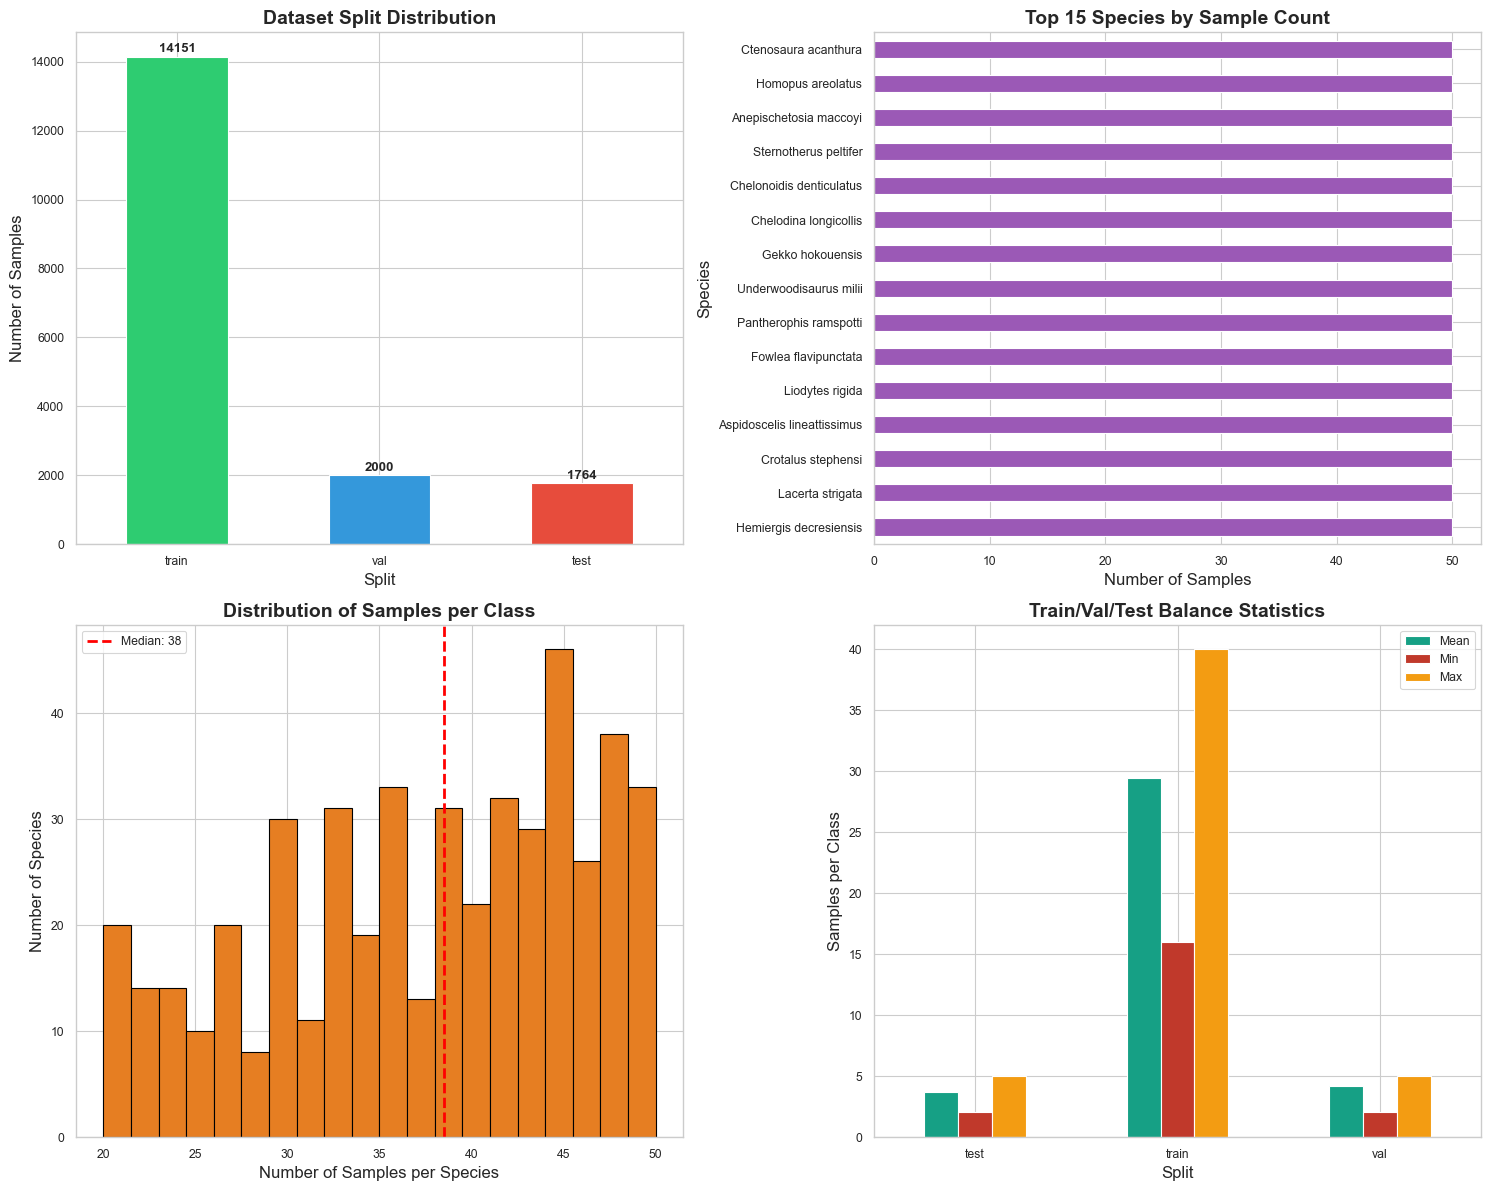

In [ ]:
# Visualize dataset statistics
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Split distribution
ax1 = axes[0, 0]
split_counts = meta["split"].value_counts()
split_counts.plot(kind='bar', ax=ax1, color=['#2ecc71', '#3498db', '#e74c3c'])
ax1.set_title('Dataset Split Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Split', fontsize=12)
ax1.set_ylabel('Number of Samples', fontsize=12)
ax1.tick_params(axis='x', rotation=0)
for i, v in enumerate(split_counts.values):
    ax1.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

# 2. Top 15 species distribution
ax2 = axes[0, 1]
top_species = meta["scientificName"].value_counts().head(15)
top_species.plot(kind='barh', ax=ax2, color='#9b59b6')
ax2.set_title('Top 15 Species by Sample Count', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Samples', fontsize=12)
ax2.set_ylabel('Species', fontsize=12)
ax2.invert_yaxis()

# 3. Samples per class distribution
ax3 = axes[1, 0]
samples_per_class = meta["scientificName"].value_counts()
ax3.hist(samples_per_class, bins=20, color='#e67e22', edgecolor='black')
ax3.set_title('Distribution of Samples per Class', fontsize=14, fontweight='bold')
ax3.set_xlabel('Number of Samples per Species', fontsize=12)
ax3.set_ylabel('Number of Species', fontsize=12)
ax3.axvline(samples_per_class.median(), color='red', linestyle='--', linewidth=2, label=f'Median: {samples_per_class.median():.0f}')
ax3.legend()

# 4. Split balance per class (showing mean, min, max)
ax4 = axes[1, 1]
split_stats = per_class.agg(['mean', 'min', 'max'])
split_stats.T.plot(kind='bar', ax=ax4, color=['#16a085', '#c0392b', '#f39c12'])
ax4.set_title('Train/Val/Test Balance Statistics', fontsize=14, fontweight='bold')
ax4.set_xlabel('Split', fontsize=12)
ax4.set_ylabel('Samples per Class', fontsize=12)
ax4.tick_params(axis='x', rotation=0)
ax4.legend(['Mean', 'Min', 'Max'])

plt.tight_layout()
plt.savefig(DATA_ROOT / 'dataset_statistics.png', dpi=300, bbox_inches='tight')
print(f"Visualization saved to: {DATA_ROOT / 'dataset_statistics.png'}")
plt.show()

# Step 15: Save Final Dataset Metadata

In [ ]:
# Save final metadata
output_metadata_path = DATA_ROOT / "reptilia_dataset_final.csv"
meta.to_csv(output_metadata_path, index=False)
print(f"Final dataset metadata saved to: {output_metadata_path}")
print(f"  Total records: {len(meta):,}")
print(f"  Columns: {', '.join(meta.columns)}")

# Create a summary file
summary = {
    "total_samples": len(meta),
    "unique_species": meta["scientificName"].nunique(),
    "train_samples": len(meta[meta["split"] == "train"]),
    "val_samples": len(meta[meta["split"] == "val"]),
    "test_samples": len(meta[meta["split"] == "test"]),
    "min_images_per_class": min_images_per_class,
    "split_ratios": split_ratios,
    "rare_threshold": 1000,
    "cap_threshold": 50,
    "processing_date": time.strftime("%Y-%m-%d %H:%M:%S")
}

summary_path = DATA_ROOT / "dataset_summary.json"
with open(summary_path, 'w') as f:
    json.dump(summary, f, indent=2)

print(f"Dataset summary saved to: {summary_path}")
print("\n" + "=" * 60)
print("ALL PROCESSING COMPLETE!")
print("=" * 60)
print("\nDataset is ready for training. Key files:")
print(f"  1. Metadata: {output_metadata_path}")
print(f"  2. Images: {IMG_DIR}")
print(f"  3. Summary: {summary_path}")
print(f"  4. Visualization: {DATA_ROOT / 'dataset_statistics.png'}")

Final dataset metadata saved to: data/biotrove_train/reptilia_dataset_final.csv
  Total records: 17,915
  Columns: photo_id, scientificName, photo_url, split
Dataset summary saved to: data/biotrove_train/dataset_summary.json

ALL PROCESSING COMPLETE!

Dataset is ready for training. Key files:
  1. Metadata: data/biotrove_train/reptilia_dataset_final.csv
  2. Images: data/biotrove_train/images_reptilia
  3. Summary: data/biotrove_train/dataset_summary.json
  4. Visualization: data/biotrove_train/dataset_statistics.png
